<h1 style="text-align:center"> Atividade Segmentação </h1>

<h3 style=" font-weight: bold;"> Bibliotecas </h3>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from tqdm.notebook import tqdm_notebook
from skimage.io import imread
from utils.image import Image

In [2]:
import warnings
warnings.filterwarnings("ignore")

<h2 style="text-align:center;">Questão 01</h2>

<p> Utilizando a base de imagens “ultrassound.zip” disponibilizada no SIGAA, realize a segmentação das imagens das seguintes formas: </p>

<p> I. Aplique o algoritmo K-means utilizando os pixels como pesos; </p>

<p>II. Implemente duas segmentações utilizando os algoritmos de binarização local e global (Niblack e Otsu, respectivamente); </p>

<p> III. Aplique outro algoritmo de agrupamento que utilize também a posição espacial dos pixels como peso; </p>

In [3]:
path = 'ultrassound/cropped/'
path_mask = 'ultrassound/masks/'
imgs = sorted(os.listdir(path))
masks = sorted(os.listdir(path_mask))
imgs_obj = [Image(f'{path}{img}') for img in imgs]

In [4]:
len(imgs), len(masks)

(206, 206)

<h3 style="text-align:center;">K-means</h3>

O K-Means é usado para agrupar pixels similares em "K" clusters, onde cada cluster é representado por um centro de cor único (centroid).O processo de clusterização é repetido várias vezes, ajustando os centros de cluster até que não haja mudanças significativas nos clusters ou até que o número máximo de iterações seja alcançado. Ao final do processo, cada pixel é atribuído a um cluster específico, o que resulta em uma segmentação da imagem em regiões distintas.

A vantagem do K-Means na segmentação de imagens é sua simplicidade e rapidez. Além disso, ele é fácil de implementar e pode ser usado para processar grandes quantidades de dados de imagem.

In [5]:
def kmeans(imgs, n_clusters):
    for img in tqdm_notebook(imgs):
        img.filtro_media()
        img.segmentar('kmeans', n_clusters)  

In [6]:
kmeans(imgs_obj, 2)

  0%|          | 0/206 [00:00<?, ?it/s]

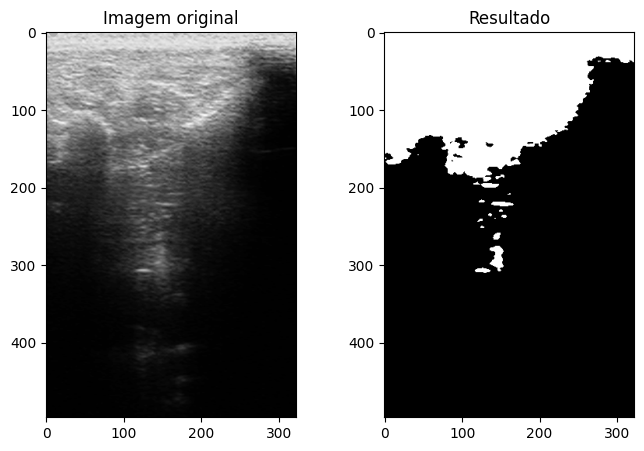

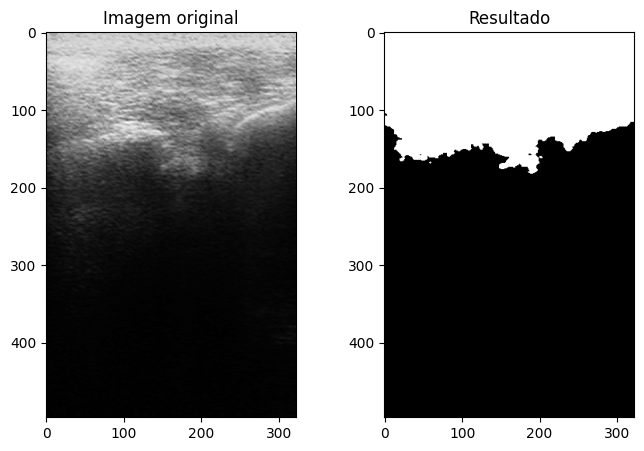

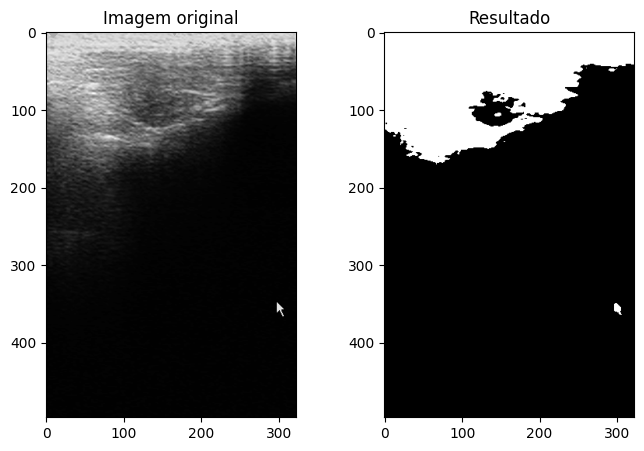

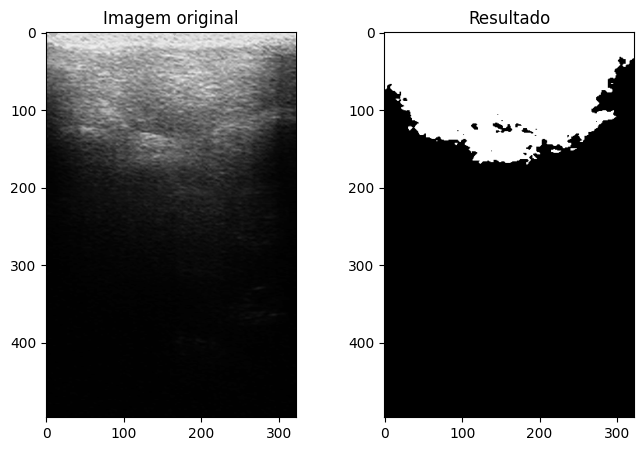

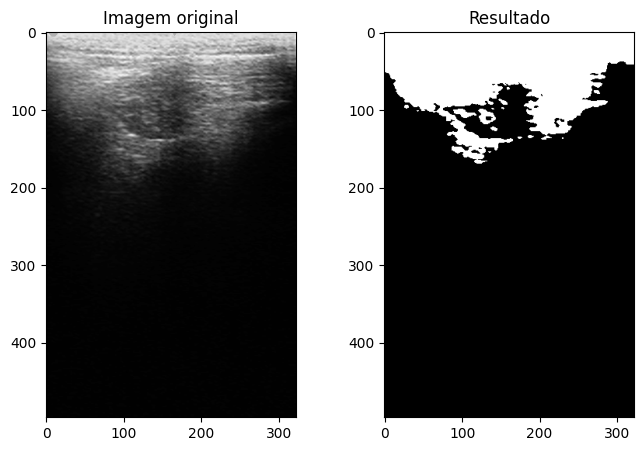

In [7]:
for img in imgs_obj[:5]:
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))
    ax[0].imshow(img.img, cmap='gray')
    ax[0].set_title('Imagem original')
    ax[1].imshow(img.img_segmentada['kmeans'], cmap='gray')
    ax[1].set_title('Resultado')

<h3 style="text-align:center;">Niblack e Otsu</h3>

<h4 style="font-weight:bold;">Niblack</h4>

O algoritmo Niblack é uma técnica de pré-processamento de imagem utilizada para melhorar a qualidade de imagens escuras ou com baixo contraste. O objetivo é aumentar a luminosidade da imagem e melhorar a clareza das informações.

A ideia por trás do algoritmo é calcular um valor de limiar para cada pixel da imagem, a fim de identificar os pixels que devem ser ajustados para melhorar a visibilidade. Isso é feito de forma dinâmica, ou seja, o valor de limiar para cada pixel é calculado a partir da vizinhança local da imagem.

$$ T(x, y) = m(x, y) + k  s(x, y) $$

Em que m(x, y) é a média dos valores de intensidade de pixels na vizinhança local do pixel (x, y), s(x, y) é o desvio padrão dos valores de intensidade na vizinhança local e k é um parâmetro de ajuste. O valor de k é geralmente escolhido em um intervalo entre -0,2 e 0,2.

Os pixels com valores de intensidade acima do limiar são considerados brilhantes e os pixels com valores de intensidade abaixo do limiar são considerados escuros. A imagem resultante tem os pixels brilhantes mantidos e os pixels escuros são ajustados para valores mais claros.

<h4 style="font-weight:bold;">Otsu</h4>

O algoritmo de Otsu é uma técnica de segmentação de imagem baseada em histograma, que visa encontrar o melhor limiar para separar a imagem em duas classes: fundo e objeto.

A ideia por trás do algoritmo é encontrar o limiar que maximiza a variação interclasse e minimiza a variação intraclasse, de forma a separar o objeto de fundo da imagem de forma mais eficiente.

A fórmula utilizada para o cálculo do limiar é baseada na variação interclasse e intraclasse:

$$ l = \frac{(\mu_1 - \mu_2)^2}{p_1 * p_2} $$

Em que $\mu_1$ e $\mu_2$ são as médias dos valores de intensidade dos pixels da classe objeto e classe fundo, respectivamente, $p_1$ e $p_2$ são as probabilidades de cada classe e l é a variação total. 

In [8]:
def niblack(imgs):
    for img in tqdm_notebook(imgs):
        img.segmentar('niblack')

In [9]:
def otsu(imgs):
    for img in tqdm_notebook(imgs):
        img.segmentar('otsu')

In [10]:
niblack(imgs_obj)

  0%|          | 0/206 [00:00<?, ?it/s]

In [11]:
otsu(imgs_obj)

  0%|          | 0/206 [00:00<?, ?it/s]

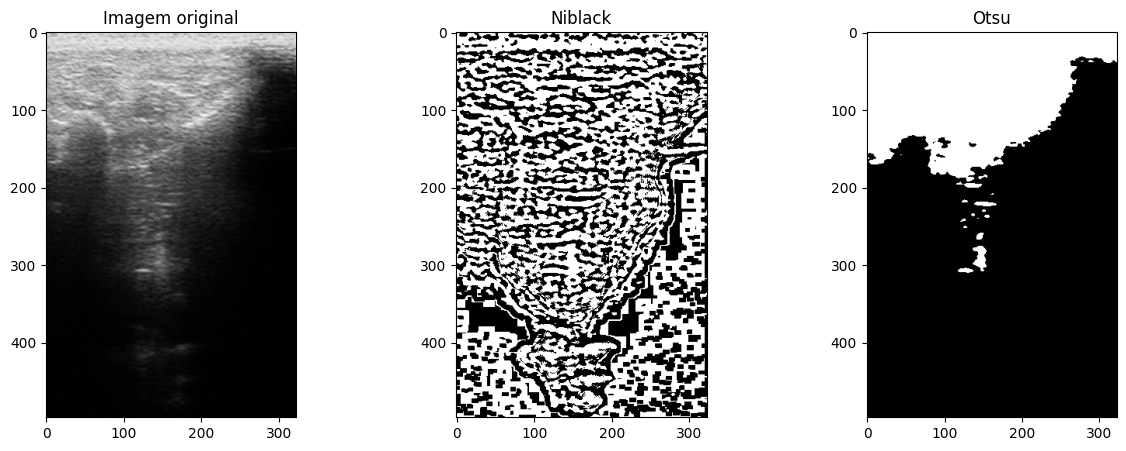

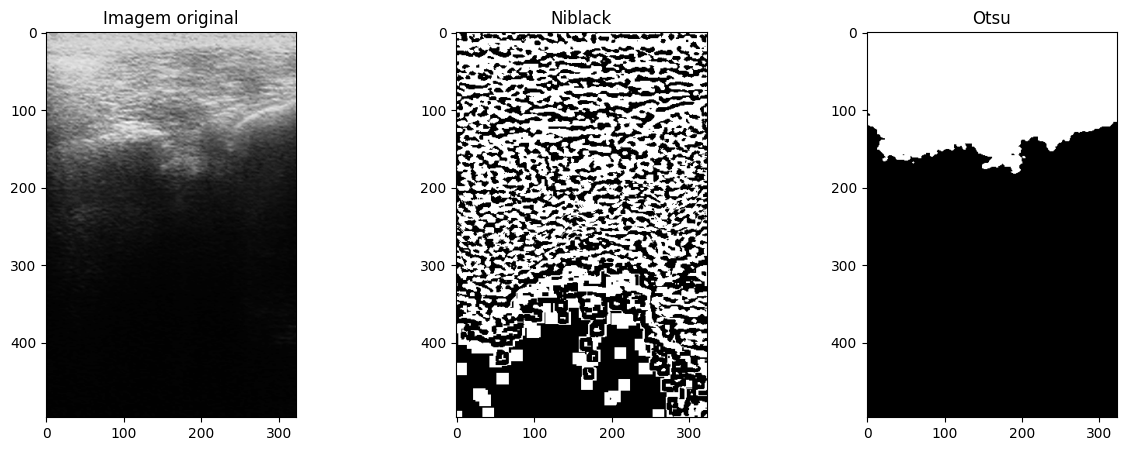

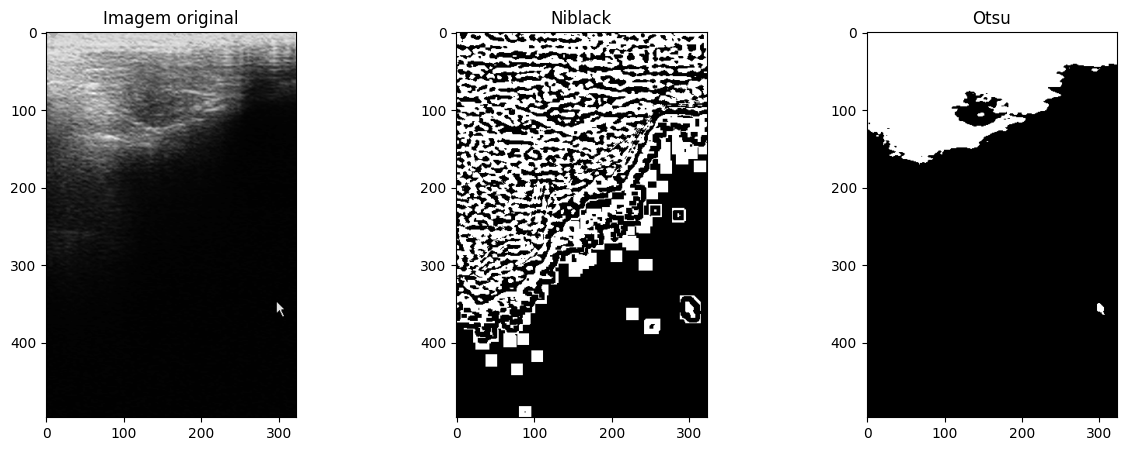

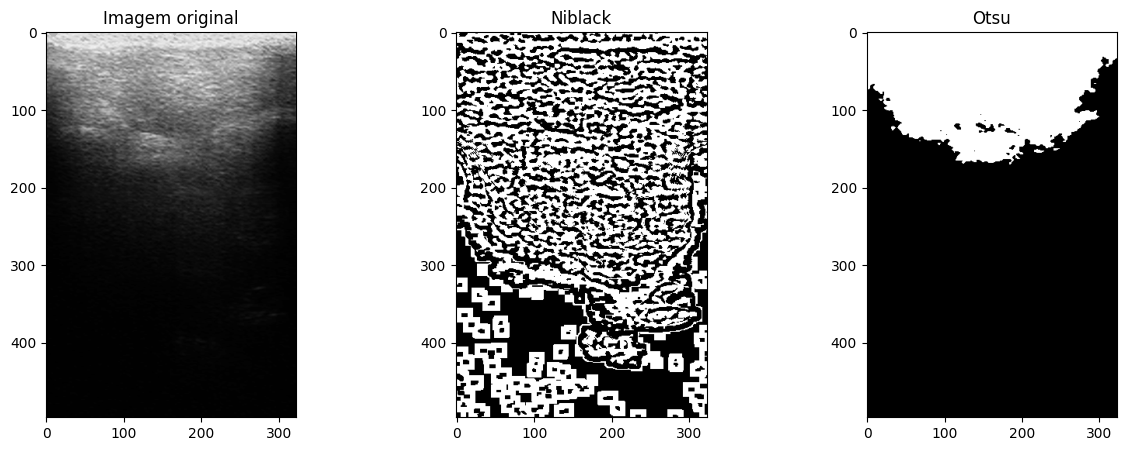

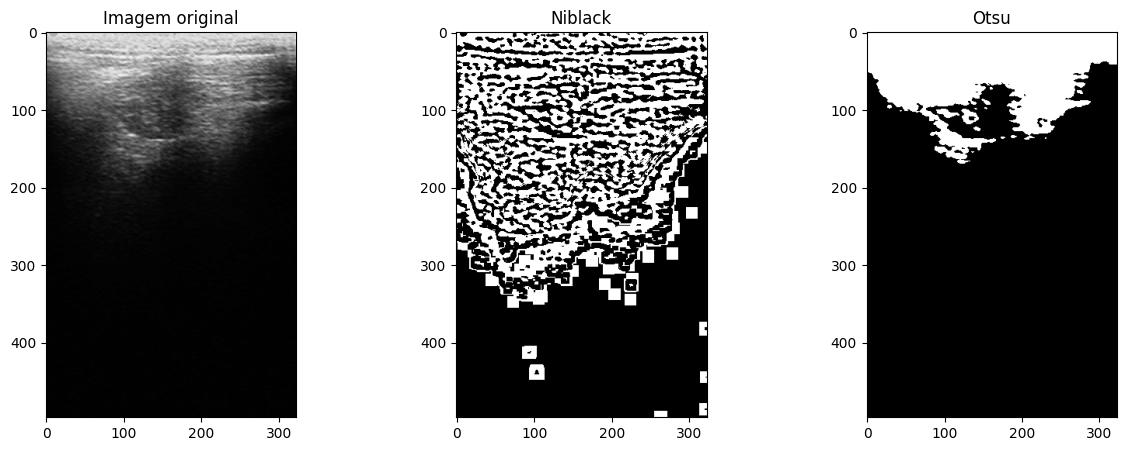

In [12]:
for img in imgs_obj[:5]:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img.img, cmap='gray')
    ax[0].set_title('Imagem original')
    ax[1].imshow(img.img_segmentada['niblack'], cmap='gray')
    ax[1].set_title('Niblack')
    ax[2].imshow(img.img_segmentada['otsu'], cmap='gray')
    ax[2].set_title('Otsu')

<h3 style="text-align:center;"> Agglomerative Clustering</h3>

O Agglomerative Clustering é um [algoritmo de agrupamento hierárquico](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) que pode ser usado para segmentação de imagens. Esse algoritmo começa com cada ponto da imagem como um cluster separado, e então combina gradualmente clusters adjacentes para formar clusters maiores até que todos os pontos da imagem estejam agrupados em um único cluster.

O processo de combinação de clusters é realizado de acordo com uma medida de distância ou similaridade entre pontos na imagem. Algumas medidas comuns incluem distância Euclidiana, distância de Mahalanobis e distância de correlação. O processo de combinação é repetido até que seja atingido o número desejado de clusters ou até que a distância entre os clusters combinados seja superior a um determinado limite.

A segmentação de imagem é realizada quando todos os pontos da imagem estão agrupados em um único cluster. Nesse ponto, cada sub-cluster pode ser identificado como uma região distinta na imagem e pode ser rotulado de acordo com a sua cor ou textura.

Vantagens do Agglomerative Clustering incluem sua simplicidade, flexibilidade e capacidade de lidar com diferentes tipos de imagens. Algumas desvantagens são:  a dificuldade de determinar o número ideal de clusters e a necessidade de calcular a distância entre todos os pontos da imagem, o que pode ser computacionalmente intensivo.

In [14]:
def agglomerative(imgs):
    for img in tqdm_notebook(imgs):
        img.redimensionar()
        img.segmentar('agglomerative')

In [16]:
agglomerative(imgs_obj)

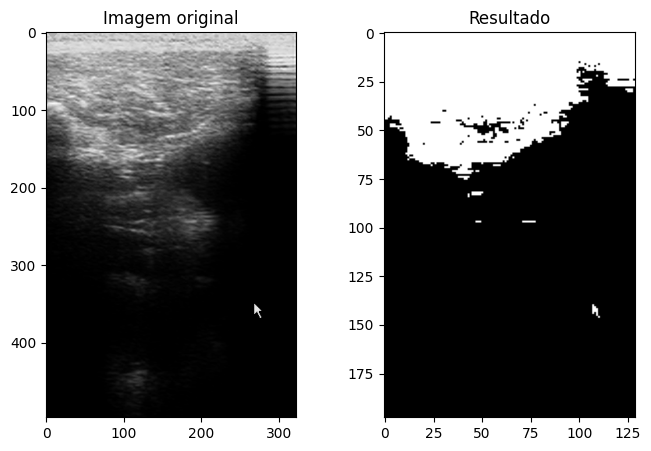

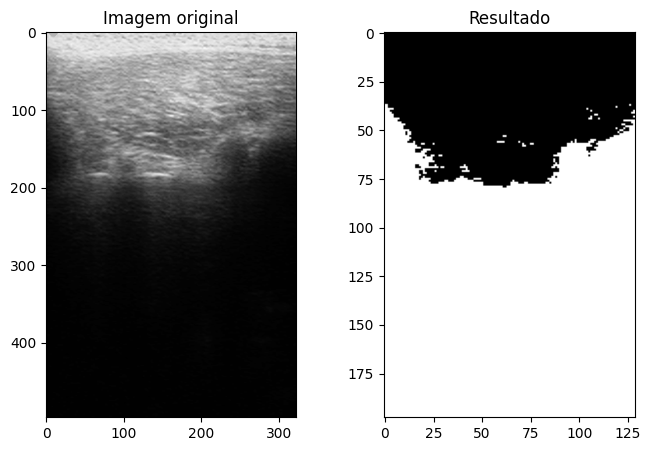

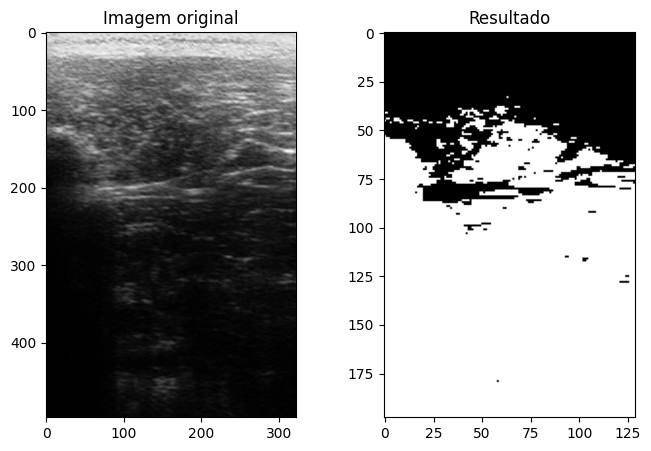

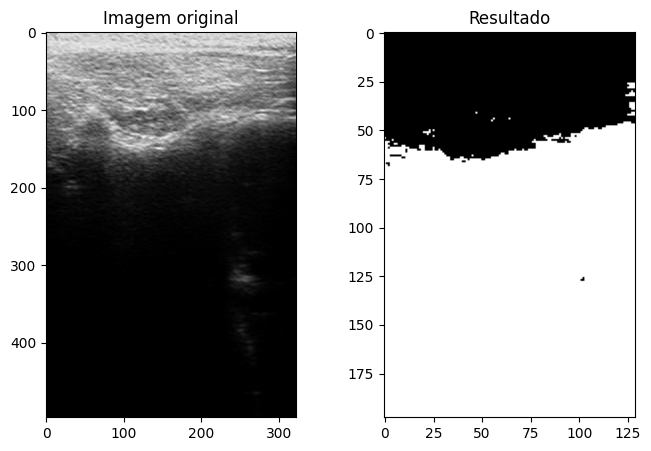

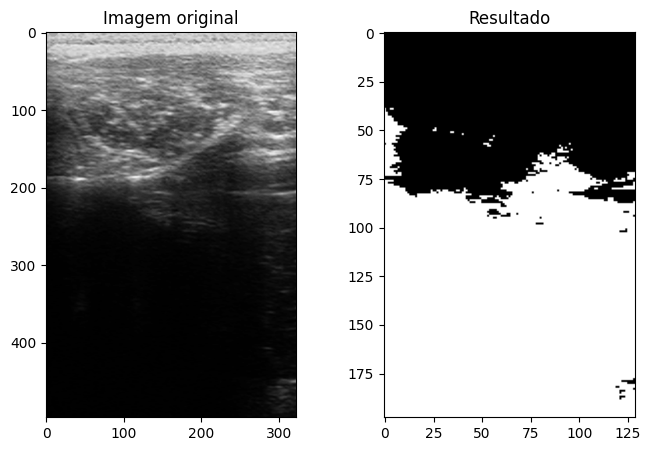

In [16]:
for img in objs[10:15]:
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))
    ax[0].imshow(img.img, cmap='gray')
    ax[0].set_title('Imagem original')
    ax[1].imshow(img.img_segmentada['agglomerative'], cmap='gray')
    ax[1].set_title('Resultado')
    plt.show()

<h2 style="text-align:center;">Questão 02</h2>

Crie um método para escolher o foreground e o background automaticamente

O metodo img.cluster() detecta o foreground e o background utilizando a imagem segmentada pelo kmeans

1. As labels (1,0) são separadas nas variaveis cluster1 e cluster2

```python
cluster1 = self.img_segmentada['kmeans'] == 0 

cluster2 = self.img_segmentada['kmeans'] == 1 
```

2. Cria uma cópia da imagem original, para salvar o resultado do  foreground e do background
```python
self.background = np.zeros_like(self.img)
self.foreground = np.zeros_like(self.img)
```

3. Os pixels pertencentes a cada cluster são adicionados as imagens vazias (0 = background, 1 = foreground)
```python
self.background[cluster1] = self.img[cluster1]
self.foreground[cluster2] = self.img[cluster2] 
```

In [17]:
for img in imgs_obj:
    img.clusters()

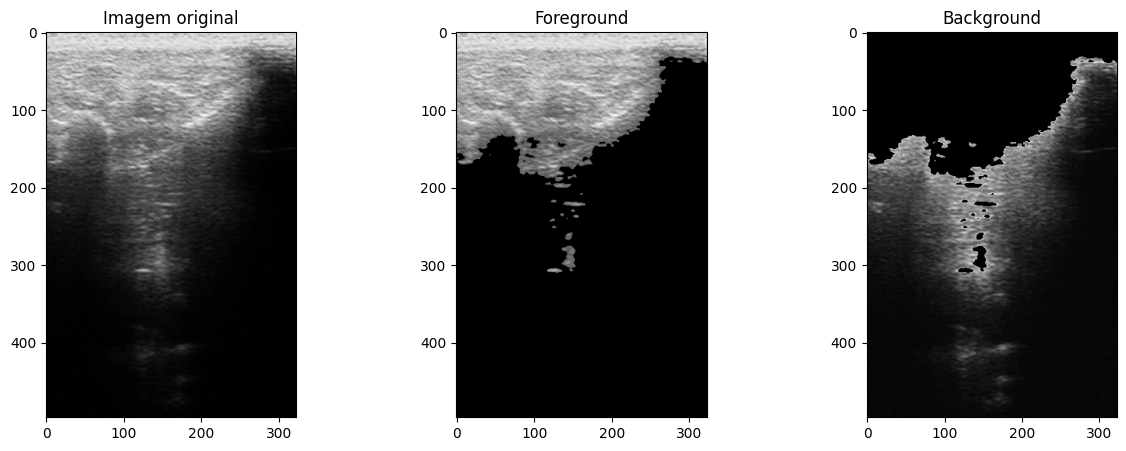

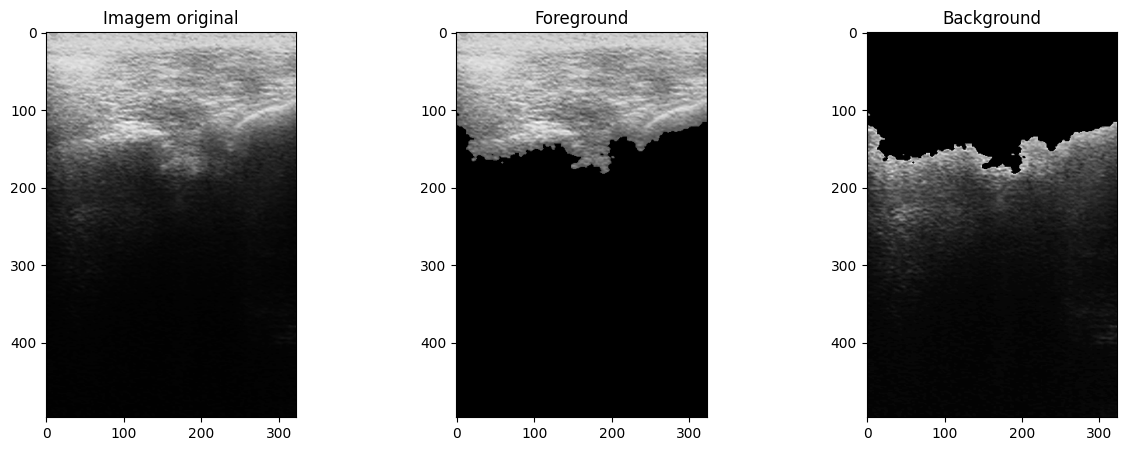

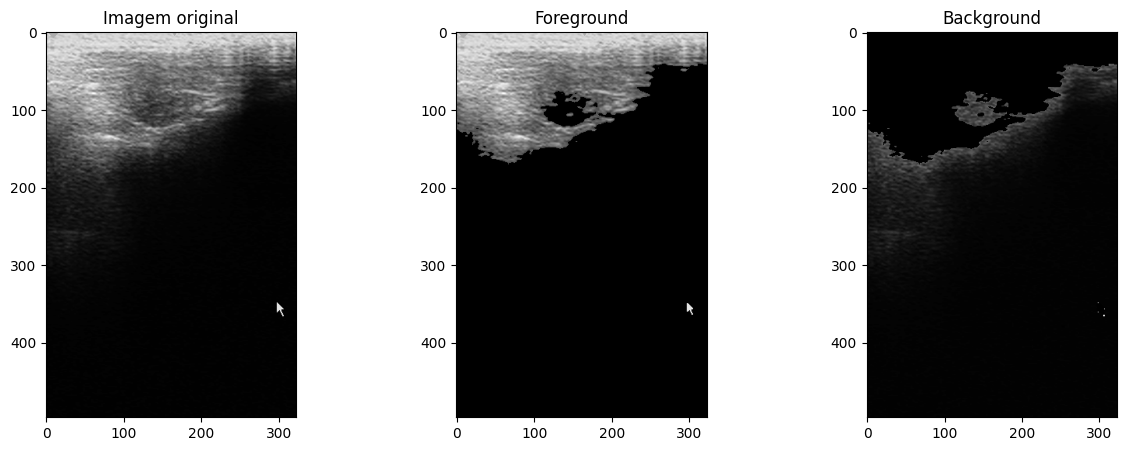

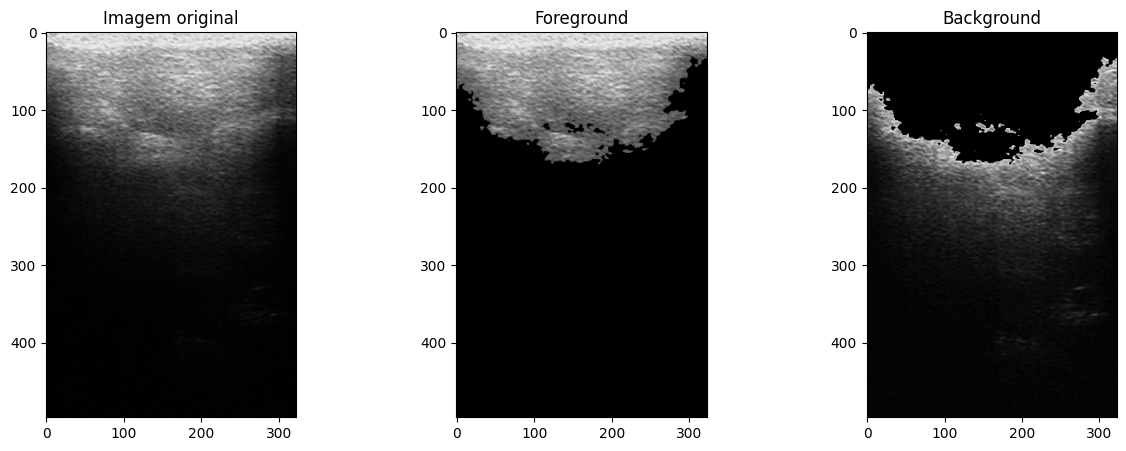

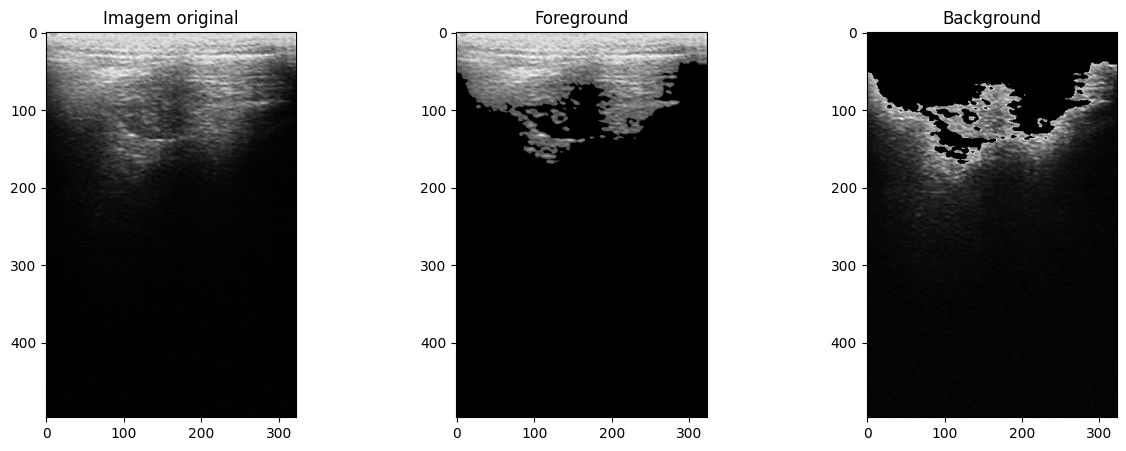

In [18]:
for img in imgs_obj[:5]:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img.img, cmap='gray')
    ax[0].set_title('Imagem original')
    ax[1].imshow(img.foreground, cmap='gray')
    ax[1].set_title('Foreground')
    ax[2].imshow(img.background, cmap='gray')
    ax[2].set_title('Background')

<h2 style="text-align:center;">Questão 03</h2>

Pesquise em artigos do estado da arte métricas de acurácia de segmentação. Aplique pelo menos duas métricas nos resultados de segmentação obtidos. Para isso, utilizem as imagens na pasta “masks” que estão na base

Com base em [[ 1 ]](https://doi.org/10.1088/1742-6596/1529/4/042017) e [[ 2 ]](https://www.sciencedirect.com/science/article/pii/S235291481930214X), foram selecionadas as seguintes metricas: 

<ul>
    <li>
        <b>Acurácia</b>: A acurácia é uma medida de precisão que avalia o quanto o modelo de segmentação se aproxima dos verdadeiros rótulos de segmentação. 
    </li>   
    <li>
        <b>Jaccard-score</b>: O índice de Jaccard é uma medida de similaridade entre dois conjuntos. É usado como uma métrica de segmentação para comparar a interseção entre a imagem de saída e os verdadeiros rótulos de segmentação com o tamanho da união entre ambos.
    </li>  
    <li>
        <b>F1-score</b>:  O F1 Score é a média harmônica da precisão e recall. É um número entre 0 e 1, sendo que valores mais próximos de 1 indicam uma boa performance de segmentação e valores mais próximos de 0 indicam uma performance fraca.
    </li>
<ul>

In [19]:
def run(imgs, masks, path_mask):
    for img, mask in tqdm_notebook(zip(imgs, masks), total=len(imgs)):
        img.load_mask(f'{path_mask}{img.name}')
        img.redimensionar_mask()
        img.calcular_metricas()

In [20]:
run(imgs_obj, masks, path_mask)

  0%|          | 0/206 [00:00<?, ?it/s]

In [28]:
acuracia = {}
jaccard = {}
f1 = {}
algoritmos = imgs_obj[0].algoritmos
for algoritmo in algoritmos:
    acuracia[f'{algoritmo}'] = [img.metricas[algoritmo]['accuracy'] for img in imgs_obj]
    jaccard[f'{algoritmo}'] = [img.metricas[algoritmo]['jaccard'] for img in imgs_obj]
    f1[f'{algoritmo}'] = [img.metricas[algoritmo]['f1'] for img in imgs_obj]

In [32]:
#Salvando as imgs
with open('imgs.pickle','wb') as i:
    pickle.dump(imgs_obj, i)

<h3 style="text-align:center;">Resultados Acurácia</h3>

In [29]:
acc = pd.DataFrame(acuracia)
acc.describe()

,agglomerative,kmeans,niblack,otsu
count,206.000000,206.000000,206.000000,206.000000
mean,0.673017,0.644924,0.380706,0.689040
std,0.119851,0.161931,0.055724,0.071078
min,0.075758,0.060904,0.270907,0.406208
25%,0.641414,0.644483,0.352039,0.655218
50%,0.702020,0.694962,0.368652,0.702618
75%,0.746212,0.728481,0.394028,0.729636
max,0.868687,0.825598,0.665062,0.825598


<h3 style="text-align:center;">Resultados jaccard score</h3>

In [30]:
jacc = pd.DataFrame(jaccard)
jacc.describe()

,agglomerative,kmeans,niblack,otsu
count,206.000000,206.000000,206.000000,206.000000
mean,0.552161,0.628965,0.351778,0.671183
std,0.110913,0.164113,0.055944,0.079557
min,0.065814,0.055861,0.218484,0.361985
25%,0.503944,0.621028,0.323211,0.646259
50%,0.564586,0.683297,0.343037,0.689543
75%,0.627530,0.717513,0.368041,0.718922
max,0.816489,0.815089,0.617715,0.815089


<h3 style="text-align:center;">Resultados F1-score</h3>

In [31]:
f1_ = pd.DataFrame(f1)
f1_.describe()

,agglomerative,kmeans,niblack,otsu
count,206.000000,206.000000,206.000000,206.000000
mean,0.629646,0.704446,0.494643,0.745313
std,0.093754,0.153716,0.056940,0.064959
min,0.120346,0.105084,0.326808,0.497981
25%,0.590540,0.707794,0.465401,0.726345
50%,0.643153,0.750941,0.490384,0.756098
75%,0.686918,0.781669,0.516756,0.782845
max,0.843458,0.873271,0.718147,0.873271


<h3 style="text-align:center;">Resultados (média)</h3>

| algoritmo     | acc | jaccard | f1  |
| :------------ | :-- | :------ | :-- |
| kmeans        |0.64 | 0.62    |0.70 |
| niblack       |0.38 |  0.35   | 0.49|
| otsu          |0.68 |  0.67   | 0.74|
| agglomerative |0.67 |  0.55   |0.62 |

<h2 style="text-align:center;">Conclusão</h2>

- O  otsu obteve os melhores resultados nas três métricas, já que é projetado especificamente para tratar dados de imagem, enquanto o k-means é um algoritmo de agrupamento geral. Além disso, o Otsu utiliza uma abordagem de histograma de imagem para determinar automaticamente a melhor separação entre o foreground e o background, enquanto o k-means pode ter dificuldade em lidar com imagens com ruído ou regiões homogêneas. 

   
- Os piores resultados foram com o niblack, devido a dificuldade em lidar com bordas suaves ou irregulares e  também, a sua sensibilidade ao ruído presente na imagem, o que pode resultar em detalhes importantes sendo perdidos ou incorporados ao background ou foreground de forma incorreta.


- Os algoritmos de agrupamento como o k-means e o agglomerative costumam ter bons resultados na segmentação de imagens porque eles procuram agrupar pixels semelhantes com base nas características da imagem (cor, intensidade, etc). No entanto, o desempenho pode ser afetado por fatores como a presença de ruído, variações de iluminação e o número insuficiente de clusters.

<h2 style="text-align:center;">Referências</h2>

[[ 1 ]](https://doi.org/10.1088/1742-6596/1529/4/042017) Mustafa, Wan Azani, et al. “Overview of Segmentation X-Ray Medical Images Using Image Processing Technique”. Journal of Physics: Conference Series, vol. 1529, nº 4, abril de 2020, p. 042017

[[ 2 ]](https://www.sciencedirect.com/science/article/pii/S235291481930214X) Rizwan I Haque, Intisar, e Jeremiah Neubert. “Deep Learning Approaches to Biomedical Image Segmentation”. Informatics in Medicine Unlocked, vol. 18, 2020, p. 100297.

[[ 3 ]](https://scikit-learn/stable/modules/model_evaluation.html) "3.3. Metrics and Scoring: Quantifying the Quality of Predictions”. Scikit-Learn

[[ 4 ]](https://scikit-learn/stable/modules/clustering.html) “2.3. Clustering”. Scikit-Learn.

[[ 5 ]](https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html) Thresholding — skimage.